In [60]:
import pandas as pd
from toolz.functoolz import compose
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exploring the data

## First sight of the records

In [440]:
sourceData = pd.read_csv('../data/train.csv', index_col = 'PassengerId').dropna(subset=['Age'])
sourceData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## The size of the data

In [441]:
sourceData.count()

Survived    714
Pclass      714
Name        714
Sex         714
Age         714
SibSp       714
Parch       714
Ticket      714
Fare        714
Cabin       185
Embarked    712
dtype: int64

## Cleaning the data

Renames the columns to convenient and meaningful strings

In [442]:
def renameColumns(dataFrame):
    dataset = dataFrame.copy()
    dataset.columns = [
        'survived',
        'social_class',
        'name',
        'sex',
        'age',
        'siblings',
        'parch',
        'ticket',
        'fare',
        'cabin',
        'embarked'
    ]
    return dataset

Removes columns that are not related to the event of surviving the catastrophe.

In [443]:
def removeTrashColumns(dataFrame): 
    return dataFrame.drop(columns = ['cabin', 'ticket'])

In [444]:
cleanPipeline = compose(removeTrashColumns, renameColumns)

In [445]:
data = cleanPipeline(sourceData)
data.head()

,survived,social_class,name,sex,age,siblings,parch,fare,embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Are age and sex related to survive?

Lets fist check the raw numbers

In [446]:
data.groupby(['sex']).survived.mean()

sex
female    0.754789
male      0.205298
Name: survived, dtype: float64

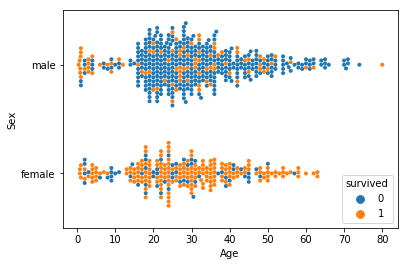

In [560]:
_ = sns.swarmplot(
    x ='age',
    y = 'sex',
    hue = 'survived',
    data = data,
    s = 4
)

_ = plt.xlabel('Age')
_ = plt.ylabel('Sex')


plt.show()

We can see that women and children tend to survive in the event, some men survived but is not the majority of the cases.

In [448]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

sex_measurement = data.sex.map(lambda sex: 0 if sex == 'male' else 1)
survival_measurement = data.survived

pearson_r(survival_measurement, sex_measurement)

0.5388255930146364

Given that the Pearson correlation coefficient is positive (0.543), exists a positive relation between the sex and the event that the person has survived or not.

In [449]:
age_measurement = data.dropna().age
survival_measurement = data.dropna().survived

pearson_r(age_measurement, survival_measurement)

-0.08244586804341388

On the other hand, for the age case, as the coefficient is a little smaller than zero (-0.25), it exists a slightly negative relationship between the age and the survival event.

## Is the fare and the social class related to the survavility?

In [450]:
fare_measurement = data.fare
survival_measurement = data.survived

pearson_r(fare_measurement, survival_measurement)

0.2681886168744788

In [451]:
social_classes = data.social_class
survival_measurement = data.survived

pearson_r(social_classes, survival_measurement)

-0.359652682086846

The fare of a passager seems related to its survavility and also the social class. A more concret idea is to say that, the more fare, the more probability to survive, this could be related to the social class of the people.

## What is that probability for each sex to survived in each class?

In [452]:
survivedCountGroups = data\
    .groupby(['sex', 'social_class', 'survived'])\
    .age\
    .describe()

survivedCountGroups

count       mean        std    min    25%   50%  \
sex    social_class survived                                                    
female 1            0           3.0  25.666667  24.006943   2.00  13.50  25.0   
                    1          82.0  34.939024  13.223014  14.00  23.25  35.0   
       2            0           6.0  36.000000  12.915107  24.00  26.25  32.5   
                    1          68.0  28.080882  12.764693   2.00  21.75  28.0   
       3            0          55.0  23.818182  12.833465   2.00  15.25  22.0   
                    1          47.0  19.329787  12.303246   0.75  13.50  19.0   
male   1            0          61.0  44.581967  14.457749  18.00  33.00  45.5   
                    1          40.0  36.248000  14.936744   0.92  27.00  36.0   
       2            0          84.0  33.369048  12.158125  16.00  24.75  30.5   
                    1          15.0  16.022000  19.547122   0.67   1.00   3.0   
       3            0         215.0  27.255814  12.135707   1.00  20.00  25.0   
                    1          38.0  22.274211  11.555786   0.42  16.50  25.0   

                                75%   max  
sex    social_class survived               
female 1            0         37.50  50.0  
                    1         44.00  63.0  
       2            0         42.50  57.0  
                    1         35.25  55.0  
       3            0         31.00  48.0  
                    1         26.50  63.0  
male   1            0         56.00  71.0  
                    1         48.00  80.0  
       2            0         39.00  70.0  
                    1         31.50  62.0  
       3            0         34.00  74.0  
                    1         29.75  45.0

In [557]:
maleMask = data.sex == 'male'
femaleMask = data.sex != 'male'
survivedMask = data.survived == 1

totalMales = data[maleMask].groupby(['social_class']).count().age
totalFemales = data[femaleMask].groupby(['social_class']).count().age

malesByClass = data[survivedMask & maleMask].groupby(['social_class']).count().age / totalMales
femalesByClass = data[survivedMask & femaleMask].groupby(['social_class']).count().age / totalFemales

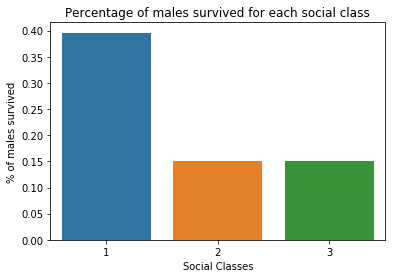

In [558]:
_ = sns.barplot(
    malesByClass.index,
    malesByClass.values,
)

_ = plt.title('Percentage of males survived for each social class')
_ = plt.xlabel('Social Classes')
_ = plt.ylabel('% of males survived')
plt.show()

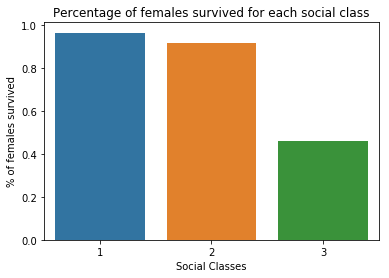

In [559]:
_ = sns.barplot(
    femalesByClass.index,
    femalesByClass.values,
)

_ = plt.title('Percentage of females survived for each social class')
_ = plt.xlabel('Social Classes')
_ = plt.ylabel('% of females survived')
plt.show()

We conclude that for upper classes, the probability to survive is really high in relation to the third class. On the other hand, for men, the situation is different. We also conclude that in men, for lower classes, the survival probability is consistent, and in upper classes it doubles.


## How the embarked port related to the survavility?

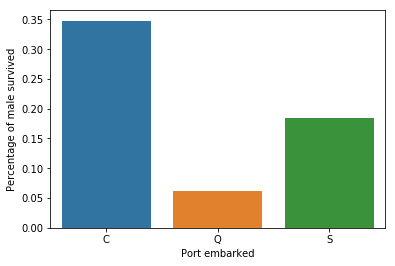

In [453]:
peopleByPort = data[(data.survived == 1) & (data.sex == 'male')].groupby(['embarked']).count().sex
totalByPort = data[maleMask].groupby(['embarked']).count().sex
percentageByPort = peopleByPort / totalByPort

_ = sns.barplot(
    percentageByPort.index,
    percentageByPort.values,
)

_ = plt.xlabel('Port embarked')
_ = plt.ylabel('Percentage of male survived')
plt.show()

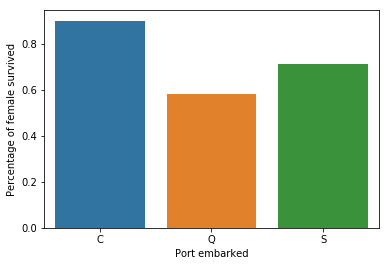

In [561]:
peopleByPort = data[(data.survived == 1) & femal].groupby(['embarked']).count().age
totalByPort = data[femaleMask].groupby(['embarked']).count().age
percentageByPort = peopleByPort / totalByPort

_ = sns.barplot(
    percentageByPort.index,
    percentageByPort.values,
)

_ = plt.xlabel('Port embarked')
_ = plt.ylabel('Percentage of female survived')
plt.show()